In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import folium
from folium import plugins

import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/deprem1970/den.xlsx
/kaggle/input/csvfile8/mycsvfile8.csv
/kaggle/input/csvfile7/mycsvfile7.csv


In [2]:
#df = pd.read_excel('/kaggle/input/deprem1970/den.xlsx')

In [3]:
data = pd.read_csv("/kaggle/input/csvfile8/mycsvfile8.csv")
data.head()

,Unnamed: 0,No,Olus tarihi,Olus zamani,Enlem,Boylam,Der(km),xM,MD,Tip,Yer,new,new2,Date,Date2,year
0,0,1,2021-03-31,23:09:45.03,350232,271395,12.0,3.5,0.0,Ke,GIRIT ADASI ACIKLARI (AKDENIZ),2021-03-31,2021.243836,31032021,32021,2021
1,1,2,2021-03-30,20:54:01.35,378915,271335,4.2,3.5,0.0,Ke,KUSADASI KORFEZI (EGE DENIZI),2021-03-30,2021.241096,30032021,32021,2021
2,2,3,2021-03-28,23:26:11.93,358712,274998,10.2,3.6,0.0,Ke,AKDENIZ,2021-03-28,2021.235616,28032021,32021,2021
3,3,4,2021-03-28,13:26:32.30,389575,260637,5.0,3.5,0.0,Ke,EGE DENIZI,2021-03-28,2021.235616,28032021,32021,2021
4,4,5,2021-03-28,04:46:16.87,388995,260152,8.6,3.5,0.0,Ke,EGE DENIZI,2021-03-28,2021.235616,28032021,32021,2021


In [4]:
data3 = pd.read_csv("/kaggle/input/csvfile8/mycsvfile8.csv")

In [5]:
data2=pd.read_csv("/kaggle/input/csvfile8/mycsvfile8.csv")
data2.head()

,Unnamed: 0,No,Olus tarihi,Olus zamani,Enlem,Boylam,Der(km),xM,MD,Tip,Yer,new,new2,Date,Date2,year
0,0,1,2021-03-31,23:09:45.03,350232,271395,12.0,3.5,0.0,Ke,GIRIT ADASI ACIKLARI (AKDENIZ),2021-03-31,2021.243836,31032021,32021,2021
1,1,2,2021-03-30,20:54:01.35,378915,271335,4.2,3.5,0.0,Ke,KUSADASI KORFEZI (EGE DENIZI),2021-03-30,2021.241096,30032021,32021,2021
2,2,3,2021-03-28,23:26:11.93,358712,274998,10.2,3.6,0.0,Ke,AKDENIZ,2021-03-28,2021.235616,28032021,32021,2021
3,3,4,2021-03-28,13:26:32.30,389575,260637,5.0,3.5,0.0,Ke,EGE DENIZI,2021-03-28,2021.235616,28032021,32021,2021
4,4,5,2021-03-28,04:46:16.87,388995,260152,8.6,3.5,0.0,Ke,EGE DENIZI,2021-03-28,2021.235616,28032021,32021,2021


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16018 entries, 0 to 16017
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16018 non-null  int64  
 1   No           16018 non-null  int64  
 2   Olus tarihi  16018 non-null  object 
 3   Olus zamani  16018 non-null  object 
 4   Enlem        16018 non-null  int64  
 5   Boylam       16018 non-null  int64  
 6   Der(km)      16018 non-null  float64
 7   xM           16018 non-null  float64
 8   MD           16018 non-null  float64
 9   Tip          16018 non-null  object 
 10  Yer          16018 non-null  object 
 11  new          16018 non-null  object 
 12  new2         16018 non-null  float64
 13  Date         16018 non-null  int64  
 14  Date2        16018 non-null  int64  
 15  year         16018 non-null  int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 2.0+ MB


In [7]:
# null  kontrolü
data.isnull().any()

Unnamed: 0     False
No             False
Olus tarihi    False
Olus zamani    False
Enlem          False
Boylam         False
Der(km)        False
xM             False
MD             False
Tip            False
Yer            False
new            False
new2           False
Date           False
Date2          False
year           False
dtype: bool

**Manisa Enlem Boylam verme**

In [8]:
data.drop(data[data['Enlem'] < 380940].index, inplace = True)
data.drop(data[data['Enlem'] > 394205].index, inplace = True)
data.drop(data[data['Boylam'] < 271286].index, inplace = True)
data.drop(data[data['Boylam'] > 291061].index, inplace = True)
data.head()

,Unnamed: 0,No,Olus tarihi,Olus zamani,Enlem,Boylam,Der(km),xM,MD,Tip,Yer,new,new2,Date,Date2,year
145,145,146,2020-12-04,03:44:31.68,392773,277873,8.2,3.5,0.0,Ke,CERKEZ SULTANIYE-SOMA (MANISA) [South East 2....,2020-12-04,2020.923497,4122020,122020,2020
176,176,177,2020-11-10,02:25:12.65,390083,271558,8.2,4.0,0.0,Ke,CEVAPLI-BERGAMA (IZMIR) [South 1.6 km],2020-11-10,2020.857923,10112020,112020,2020
219,219,220,2020-11-02,07:57:05.84,381567,273273,4.7,3.8,0.0,Ke,KAPLANCIK-TORBALI (IZMIR) [South East 3.0 km],2020-11-02,2020.836066,2112020,112020,2020
220,220,221,2020-11-02,06:22:18.72,383708,276503,7.9,3.7,0.0,Ke,OVACIK-KEMALPASA (IZMIR) [North West 3.3 km],2020-11-02,2020.836066,2112020,112020,2020
233,233,234,2020-11-01,01:34:55.18,389415,271503,8.4,3.5,0.0,Ke,KIZILTEPE-BERGAMA (IZMIR) [East 1.4 km],2020-11-01,2020.833333,1112020,112020,2020


In [9]:
import folium
from folium import plugins

n = folium.Map(location=[38,34], tiles="OpenStreetMap", zoom_start=6,  width="%100",
height="%100",)

    
for index, row in data.iterrows():
    folium.CircleMarker(location=[((row["Enlem"]-(row["Enlem"]/10000))/10000), ((row["Boylam"]-(row["Boylam"]/10000))/10000)], radius=0.3, color='purple',).add_to(n)


n

**DB SCAN**

In [10]:
x=data.iloc[:,[6,12]].values

In [11]:
x.shape

(1065, 2)

In [12]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=3,min_samples=4,metric='euclidean')

In [13]:
model=db.fit(x)


In [14]:
label=model.labels_

In [15]:
label

array([ 0,  0,  0, ...,  4,  0, -1])

In [16]:
from sklearn import metrics

#identifying the points which makes up our core points
sample_cores=np.zeros_like(label,dtype=bool)

sample_cores[db.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 7


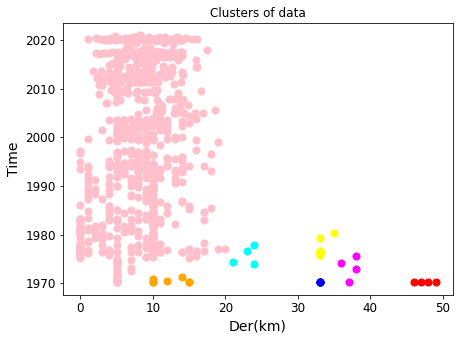

In [17]:
y_means = db.fit_predict(x)
plt.figure(figsize=(7,5))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'pink')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'yellow')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'cyan')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 50, c = 'magenta')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 50, c = 'orange')
plt.scatter(x[y_means == 5, 0], x[y_means == 5, 1], s = 50, c = 'blue')
plt.scatter(x[y_means == 6, 0], x[y_means == 6, 1], s = 50, c = 'red')
plt.scatter(x[y_means == 7, 0], x[y_means == 7, 1], s = 50, c = 'black')
plt.scatter(x[y_means == 8, 0], x[y_means == 8, 1], s = 50, c = 'violet')
plt.xlabel('Der(km)')
plt.ylabel('Time')
plt.title('Clusters of data')
plt.show()

1980 den itibaren derinlik al, 0-20 km arası

**Clustering**

/opt/conda/lib/python3.7/site-packages/yellowbrick/utils/kneed.py:155: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/opt/conda/lib/python3.7/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


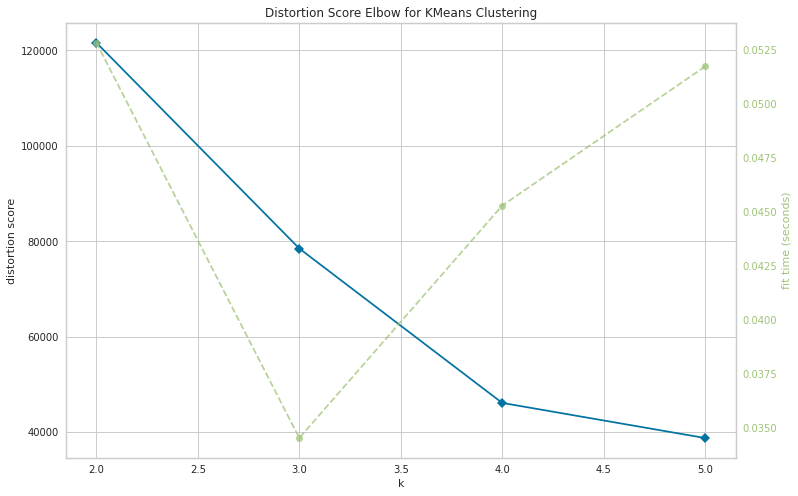

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

fig = plt.figure(figsize=(12,8))

# KNears Neighbors 
data.head()

X = data[["Der(km)", "new2"]]


# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,6))

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof() 

In [19]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=4)  
kmeans.fit(X)

KMeans(n_clusters=4)

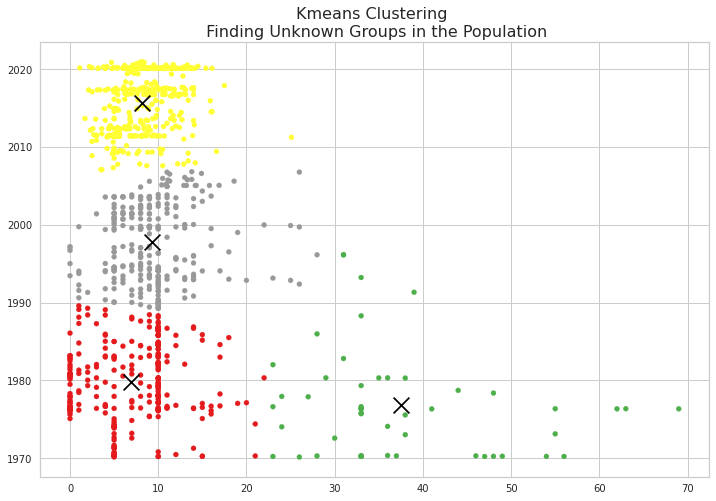

In [20]:
fig = plt.figure(figsize=(12,8))

plt.scatter(X.values[:,0], X.values[:,1], c=kmeans.labels_, cmap="Set1_r", s=25)
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black', marker="x", s=250)
plt.title("Kmeans Clustering \n Finding Unknown Groups in the Population", fontsize=16)
plt.show()

**3D Clustering**

In [21]:
# import the libraries
import numpy as np
import pandas as pd 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py

In [22]:
# input matrix for segmentation
x = data[['Der(km)','new2','Enlem', 'Boylam']].values

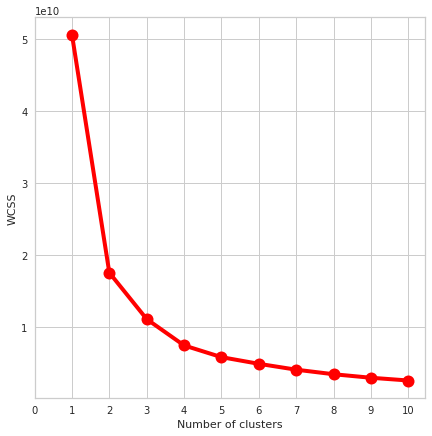

In [23]:
# find the optimal number of clusters using elbow method  -- >This is for 3 features = [age,anual income,spending score]

WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'red')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [24]:
# finding the clusters based on input matrix "x"
model = KMeans(n_clusters = 4, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:ylabel='count'>

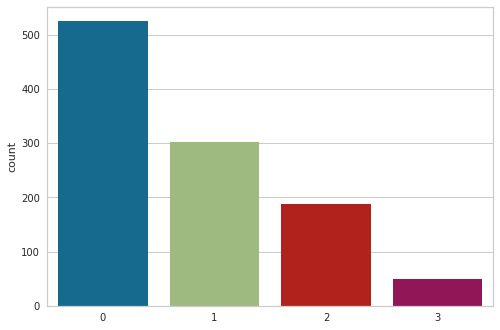

In [25]:
# countplot to check the number of clusters and number of customers in each cluster
#enlemin çok etkili olmadığını gördük
sns.countplot(y_clusters)

In [26]:
print(x[y_clusters == 0,0][1])
print(x[y_clusters == 0,1][1])
print(x[y_clusters == 0,3][1])

7.5
2020.636612021858
276843.0


In [27]:
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'Derinlik'),yaxis = dict(title  = 'Zaman'),zaxis = dict(title  = 'Boylam'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = model.labels_
trace = go.Scatter3d(x=x[:, 0], y=x[:, 1], z=x[:, 3], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

enlem boylam derinlik -- 2018-2021 arası bakılabilir

enlem boylam zaman çiz

Burada 29 boylamlarında 1970 ile 1980 yılları arasında derinliği 0 ile 20 arasında olduğu görülüyor. 
Mavi noktalarda iki tane kümelenme olduğu görülüyor.

**Kırkağaç**

In [28]:
data4 = data3[data3['Yer'].str.contains("KIRKAGAC")]

In [29]:
data4.head()

,Unnamed: 0,No,Olus tarihi,Olus zamani,Enlem,Boylam,Der(km),xM,MD,Tip,Yer,new,new2,Date,Date2,year
460,460,461,2020-08-21,17:57:14.64,390807,276843,7.5,3.6,0.0,Ke,BAKIR-KIRKAGAC (MANISA) [West 1.7 km],2020-08-21,2020.636612,21082020,82020,2020
591,591,592,2020-05-29,05:40:08.40,390987,277783,7.9,4.1,0.0,Ke,ILYASLAR-KIRKAGAC (MANISA) [North West 2.2 km],2020-05-29,2020.407104,29052020,52020,2020
631,631,632,2020-04-20,10:55:02.02,391358,277953,2.2,3.5,0.0,Ke,HAMITLI-KIRKAGAC (MANISA) [South West 1.8 km],2020-04-20,2020.300546,20042020,42020,2020
633,633,634,2020-04-19,08:32:02.10,391043,278005,7.8,4.3,0.0,Ke,KARAKURT-KIRKAGAC (MANISA) [South West 1.3 km],2020-04-19,2020.297814,19042020,42020,2020
636,636,637,2020-04-16,02:49:09.10,390948,278187,13.0,4.5,0.0,Ke,KARAKURT-KIRKAGAC (MANISA) [South East 2.0 km],2020-04-16,2020.289617,16042020,42020,2020


In [30]:
data4.shape

(98, 16)

SADECE KIRKAĞAÇ ENLEM BOYLAMLARINI VERİNCE 1 TANE VERİ BULUYOR
BU YÜZDEN YER KISMINDA EŞİTLEYEREK DENEDİM, O ZAMAN 98 VERİ BULUYOR

In [31]:
data2.drop(data2[data2['Enlem'] < 390910].index, inplace = True)
data2.drop(data2[data2['Enlem'] > 391242].index, inplace = True)
data2.drop(data2[data2['Boylam'] < 276669].index, inplace = True)
data2.drop(data2[data2['Boylam'] > 276884].index, inplace = True)
data2.head()

,Unnamed: 0,No,Olus tarihi,Olus zamani,Enlem,Boylam,Der(km),xM,MD,Tip,Yer,new,new2,Date,Date2,year
15107,15111,15112,1975-05-30,05:13:44.80,391200,276800,10.0,4.0,0.0,Ke,KIRKAGAC (MANISA) [North East 1.7 km],1975-05-30,1975.350685,30051975,51975,1975


In [32]:
data2.shape

(1, 16)

In [33]:
import folium
from folium import plugins

n = folium.Map(location=[38,34], tiles="OpenStreetMap", zoom_start=6,  width="%100",
height="%100",)

    
for index, row in data4.iterrows():
    folium.CircleMarker(location=[((row["Enlem"]-(row["Enlem"]/10000))/10000), ((row["Boylam"]-(row["Boylam"]/10000))/10000)], radius=0.3, color='purple',).add_to(n)


n

**DB SCAN**

In [34]:
data4.head()

,Unnamed: 0,No,Olus tarihi,Olus zamani,Enlem,Boylam,Der(km),xM,MD,Tip,Yer,new,new2,Date,Date2,year
460,460,461,2020-08-21,17:57:14.64,390807,276843,7.5,3.6,0.0,Ke,BAKIR-KIRKAGAC (MANISA) [West 1.7 km],2020-08-21,2020.636612,21082020,82020,2020
591,591,592,2020-05-29,05:40:08.40,390987,277783,7.9,4.1,0.0,Ke,ILYASLAR-KIRKAGAC (MANISA) [North West 2.2 km],2020-05-29,2020.407104,29052020,52020,2020
631,631,632,2020-04-20,10:55:02.02,391358,277953,2.2,3.5,0.0,Ke,HAMITLI-KIRKAGAC (MANISA) [South West 1.8 km],2020-04-20,2020.300546,20042020,42020,2020
633,633,634,2020-04-19,08:32:02.10,391043,278005,7.8,4.3,0.0,Ke,KARAKURT-KIRKAGAC (MANISA) [South West 1.3 km],2020-04-19,2020.297814,19042020,42020,2020
636,636,637,2020-04-16,02:49:09.10,390948,278187,13.0,4.5,0.0,Ke,KARAKURT-KIRKAGAC (MANISA) [South East 2.0 km],2020-04-16,2020.289617,16042020,42020,2020


In [35]:
x2=data4.iloc[:,[6,12]].values

In [36]:
x2.shape

(98, 2)

In [37]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=3,min_samples=4,metric='euclidean')

In [38]:
model=db.fit(x2)

In [39]:
label=model.labels_

In [40]:
from sklearn import metrics

#identifying the points which makes up our core points
sample_cores=np.zeros_like(label,dtype=bool)

sample_cores[db.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 4


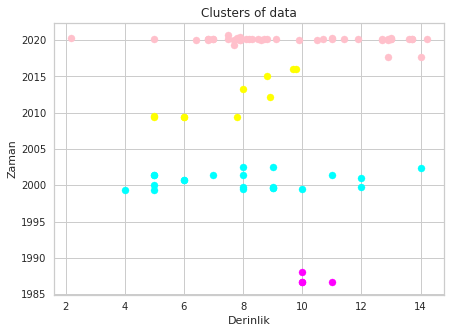

In [41]:
y_means = db.fit_predict(x2)
plt.figure(figsize=(7,5))
plt.scatter(x2[y_means == 0, 0], x2[y_means == 0, 1], s = 50, c = 'pink')
plt.scatter(x2[y_means == 1, 0], x2[y_means == 1, 1], s = 50, c = 'yellow')
plt.scatter(x2[y_means == 2, 0], x2[y_means == 2, 1], s = 50, c = 'cyan')
plt.scatter(x2[y_means == 3, 0], x2[y_means == 3, 1], s = 50, c = 'magenta')
plt.scatter(x2[y_means == 4, 0], x2[y_means == 4, 1], s = 50, c = 'orange')
plt.scatter(x2[y_means == 5, 0], x2[y_means == 5, 1], s = 50, c = 'blue')
plt.scatter(x2[y_means == 6, 0], x2[y_means == 6, 1], s = 50, c = 'red')
plt.scatter(x2[y_means == 7, 0], x2[y_means == 7, 1], s = 50, c = 'black')
plt.scatter(x2[y_means == 8, 0], x2[y_means == 8, 1], s = 50, c = 'violet')
plt.xlabel('Derinlik')
plt.ylabel('Zaman')
plt.title('Clusters of data')
plt.show()